--2024-10-16 10:17:57--  https://raw.githubusercontent.com/Abishek0411/Machinge-Learning-Lab/main/hour.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1156736 (1.1M) [text/plain]
Saving to: ‘hour.csv.2’

hour.csv.2          100%[===================>]   1.10M  --.-KB/s    in 0.06s   

2024-10-16 10:17:58 (19.0 MB/s) - ‘hour.csv.2’ saved [1156736/1156736]

Dataset Overview:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   

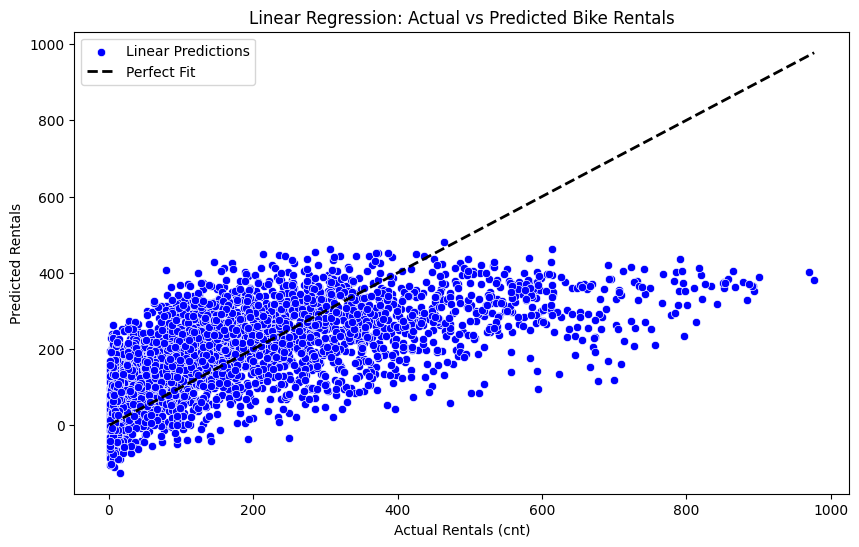

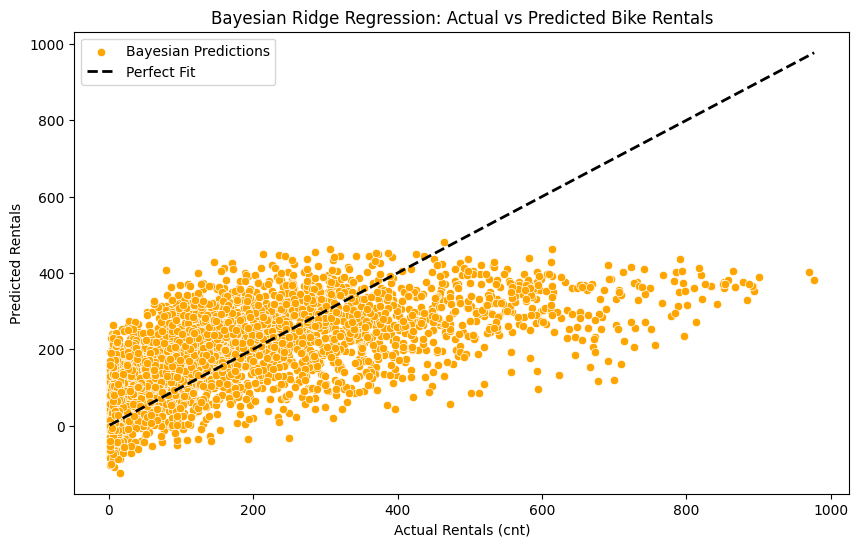

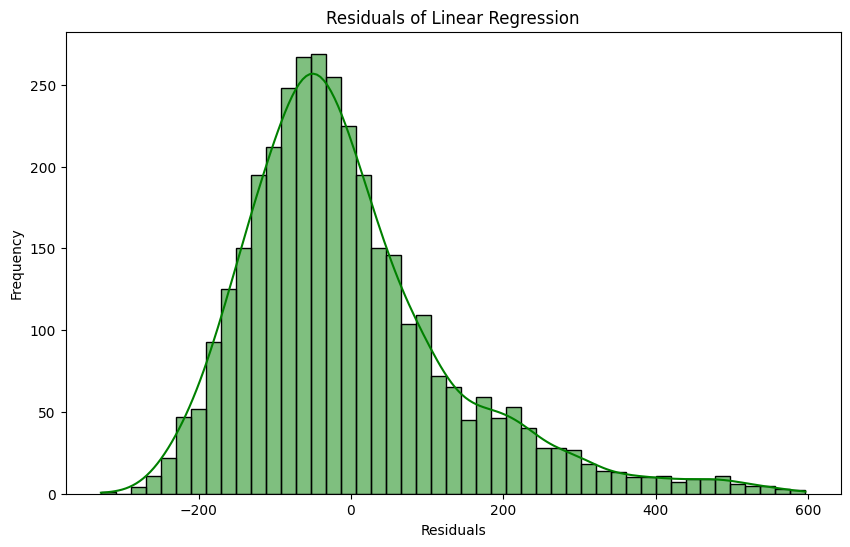

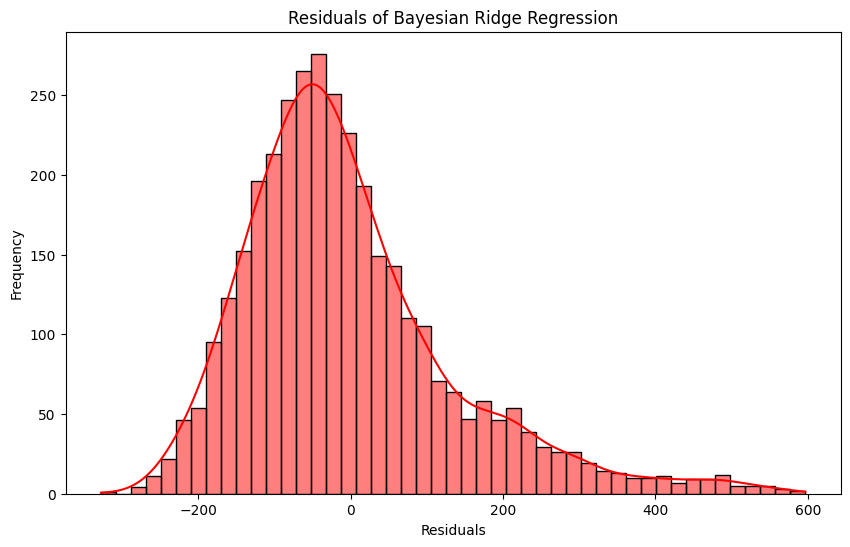

In [4]:
# Install necessary libraries
!pip install numpy pandas scikit-learn matplotlib seaborn

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

# Download the dataset from GitHub using wget
!wget https://raw.githubusercontent.com/Abishek0411/Machinge-Learning-Lab/main/hour.csv

# Load the downloaded CSV file into a pandas DataFrame
df = pd.read_csv('hour.csv')

# Display the first few rows of the dataset
print("Dataset Overview:")
print(df.head())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Basic Data Preprocessing
# Select relevant features (excluding non-predictive columns)
features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
            'weathersit', 'temp', 'hum', 'windspeed', 'atemp']

X = df[features]
y = df['cnt']  # 'cnt' is the count of total rentals (target variable)

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardize features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Linear Regression using scikit-learn
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predictions using Linear Regression
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"\nLinear Regression MSE: {mse_linear}")
print(f"Linear Regression R-squared: {r2_linear}")

# 2. Bayesian Ridge Regression using scikit-learn
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train_scaled, y_train)

# Predictions using Bayesian Ridge Regression
y_pred_bayesian = bayesian_model.predict(X_test_scaled)

# Evaluate Bayesian Ridge Regression
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)
r2_bayesian = r2_score(y_test, y_pred_bayesian)

print(f"\nBayesian Ridge Regression MSE: {mse_bayesian}")
print(f"Bayesian Ridge Regression R-squared: {r2_bayesian}")

# 3. Comparison of Models

# Plot: Predicted vs Actual Rentals for Linear Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_linear, color='blue', label='Linear Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Perfect Fit")
plt.title('Linear Regression: Actual vs Predicted Bike Rentals')
plt.xlabel('Actual Rentals (cnt)')
plt.ylabel('Predicted Rentals')
plt.legend()
plt.show()

# Plot: Predicted vs Actual Rentals for Bayesian Ridge Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_bayesian, color='orange', label='Bayesian Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Perfect Fit")
plt.title('Bayesian Ridge Regression: Actual vs Predicted Bike Rentals')
plt.xlabel('Actual Rentals (cnt)')
plt.ylabel('Predicted Rentals')
plt.legend()
plt.show()

# Residual Plot: Linear Regression
plt.figure(figsize=(10, 6))
sns.histplot((y_test - y_pred_linear), kde=True, color='green')
plt.title('Residuals of Linear Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Residual Plot: Bayesian Ridge Regression
plt.figure(figsize=(10, 6))
sns.histplot((y_test - y_pred_bayesian), kde=True, color='red')
plt.title('Residuals of Bayesian Ridge Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
